In [9]:
import fitsio
%matplotlib inline
from routines import *
data_dir = './'

In [10]:
##################################################
# read data
d0 = fits_to_pandas(fitsio.read(data_dir + 'Becker_CAM_mock.fits', lower=True))
box_size = 250.0    
np.random.seed(111)
densities = pd.read_csv('density_proxies.csv')
d0['zr'] = d0['z'] + d0['vz']/h/100.00

In [11]:
d = d0
d['$\Sigma_{5}$'] = densities['$\Sigma_{5}$'].values
d['$R_{hill_{mass}}$'] = densities['$R_{hill_{mass}}$'].values
d_train, d_test = split_octant(d, box_size)

#HOD PLOTS 

In [13]:
features = ['$R_{hill_{mass}}$', 'mstar']
Xtrain, ytrain = select_features(features, d_train, scaled=False)
Xtest, ytest = select_features(features, d_test, scaled=False)
model = DecisionTreeRegressor()
model.fit(Xtrain, ytrain)

y_hat = model.predict(Xtest)
d_test['pred'] = y_hat
print min(y_hat), max(y_hat)

-13.0022602081 -8.60770988464


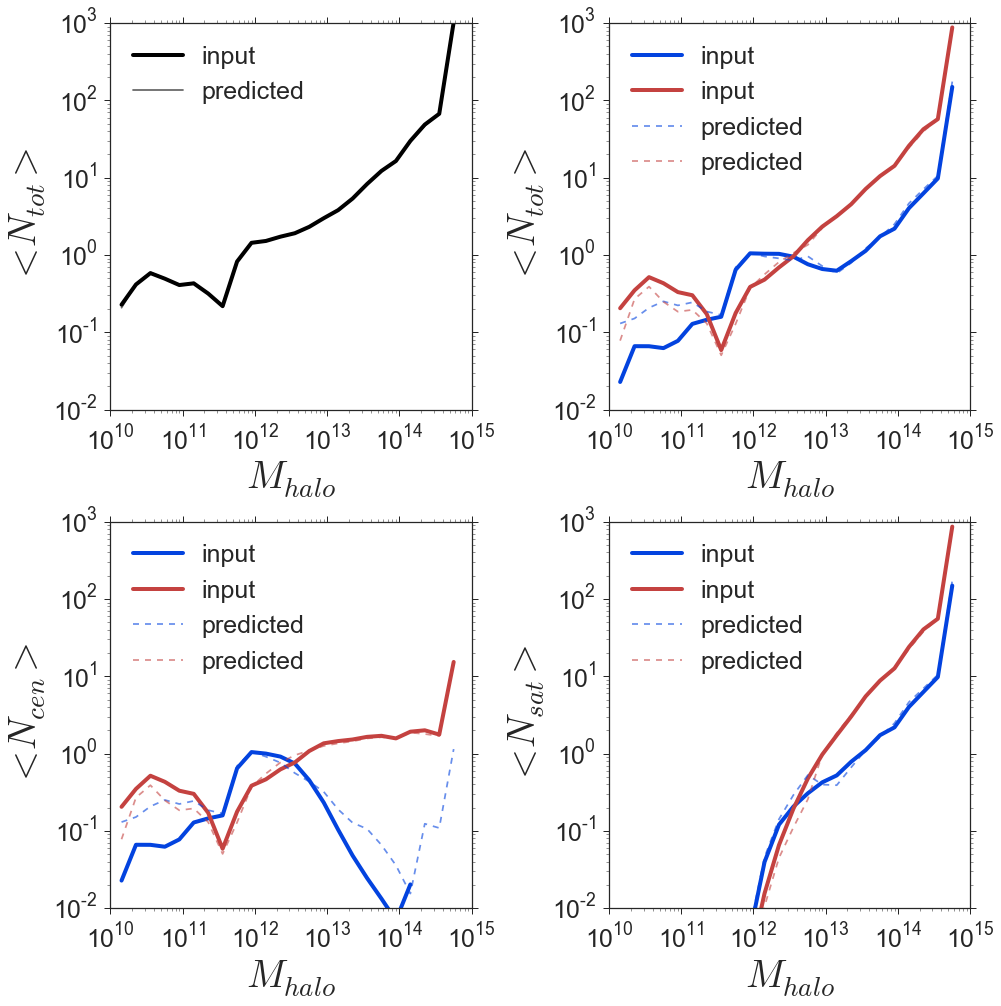

In [14]:
plot_HOD(d0, d_test, 'rhill_mass', 9.0, 13.0)

In [6]:
features = ['$\Sigma_{5}$', 'mstar']
Xtrain, ytrain = select_features(features, d_train, scaled=False)
Xtest, ytest = select_features(features, d_test, scaled=False)
model = DecisionTreeRegressor()
model.fit(Xtrain, ytrain)

y_hat = model.predict(Xtest)
d_test['pred'] = y_hat
print min(y_hat), max(y_hat)

-13.0022602081 -8.60770988464


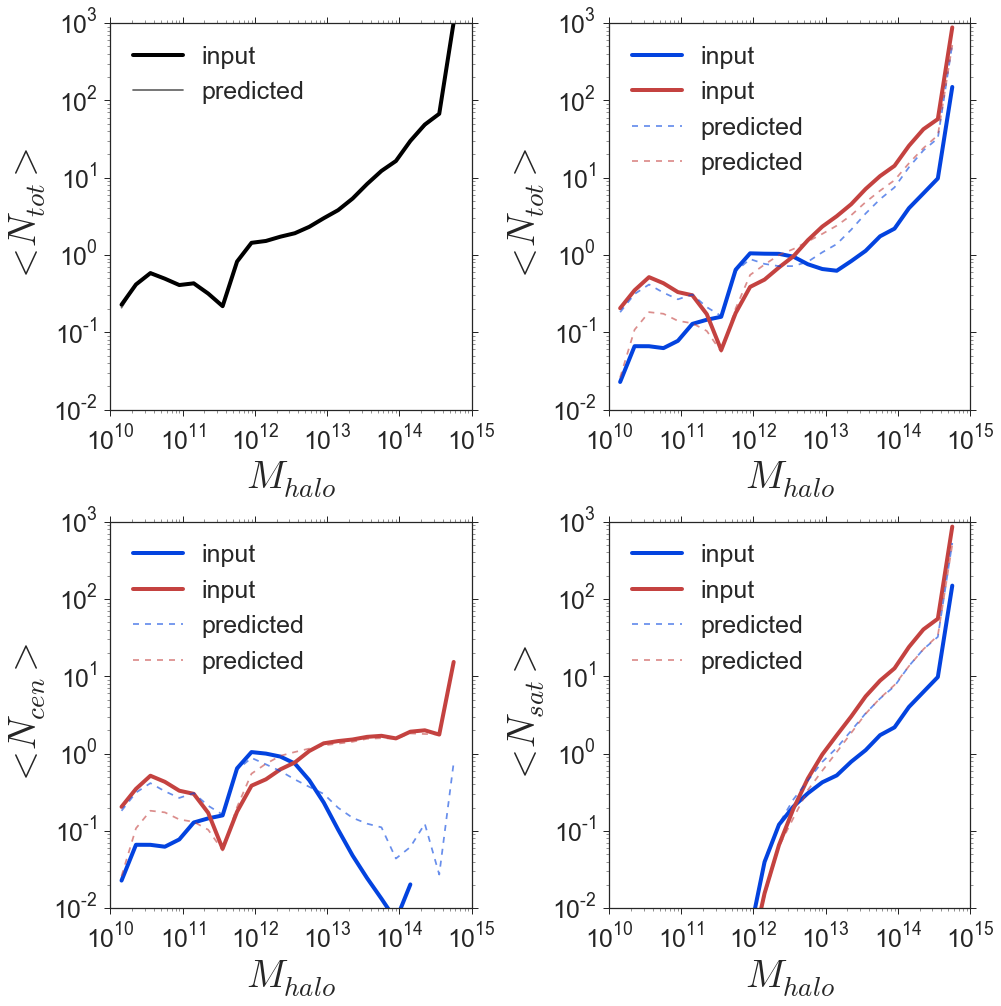

In [7]:
plot_HOD(d0, d_test, 'Sigma_5', 9.0, 13.0)

#Density Profiles

In [ ]:
# full profiles

In [ ]:
plot_density_profile(d, d_test, d_test,'test',coords='redshift')

In [ ]:
# SF profiles

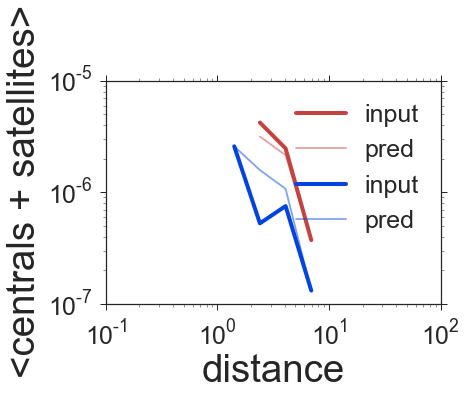

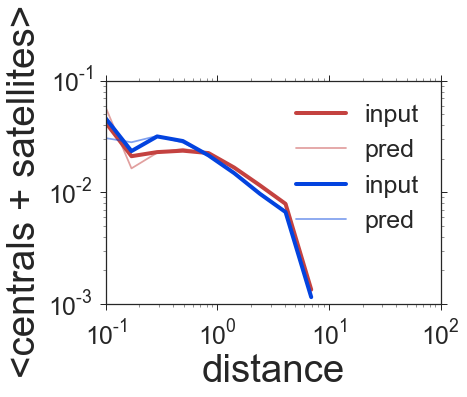

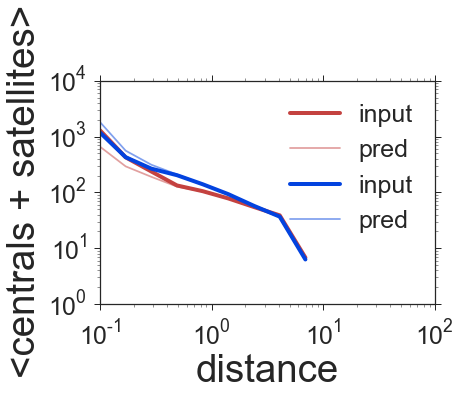

In [15]:
plot_density_profile(d[d['ssfr']> -11], d_test, d_test,'test',coords='redshift')

In [ ]:
# quenched profiles

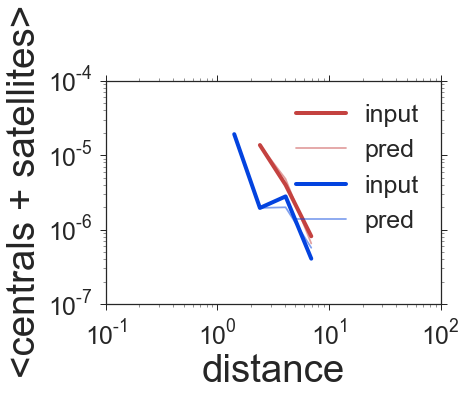

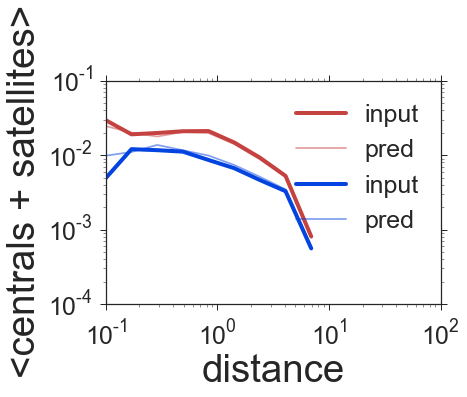

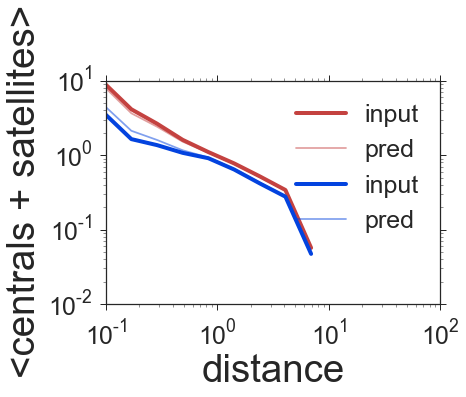

In [ ]:
plot_density_profile(d[d['ssfr']< -11], d_test, d_test,'test',coords='redshift')